# ================ SLEEP STAGE =================

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sleep_stage.csv', sep=',', skiprows=1, index_col=False)

print(df.head(3))

   create_sh_ver               start_time  \
0            NaN  2023-04-16 19:58:00.000   
1            NaN  2023-04-16 20:20:00.000   
2            NaN  2023-04-16 20:33:00.000   

                               sleep_id  custom  modify_sh_ver  \
0  8d6d9ced-7394-4ead-8c70-21fa4649ed70     NaN            NaN   
1  8d6d9ced-7394-4ead-8c70-21fa4649ed70     NaN            NaN   
2  8d6d9ced-7394-4ead-8c70-21fa4649ed70     NaN            NaN   

               update_time              create_time  stage time_offset  \
0  2023-04-17 00:31:59.090  2023-04-17 00:31:59.090  40002    UTC+0400   
1  2023-04-17 00:31:59.090  2023-04-17 00:31:59.090  40003    UTC+0400   
2  2023-04-17 00:31:59.090  2023-04-17 00:31:59.090  40001    UTC+0400   

   deviceuuid                     pkg_name                 end_time  \
0  g1H1gSpl4L  com.sec.android.app.shealth  2023-04-16 20:20:00.000   
1  g1H1gSpl4L  com.sec.android.app.shealth  2023-04-16 20:33:00.000   
2  g1H1gSpl4L  com.sec.android.app.shealth  

In [ ]:
# diff utc need to be standaridized

unique_devices = df['time_offset'].nunique()

print(df['time_offset'].unique())


['UTC+0400' 'UTC+0300' 'UTC+0800' 'UTC+0700']


In [ ]:
# remove empty columns
df = df.drop(columns=['create_sh_ver', 'pkg_name','modify_sh_ver','datauuid','create_time','custom'])

print(df.head())

                start_time                              sleep_id  \
0  2023-04-16 19:58:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
1  2023-04-16 20:20:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
2  2023-04-16 20:33:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
3  2023-04-16 20:36:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
4  2023-04-16 20:50:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   

               update_time  stage time_offset  deviceuuid  \
0  2023-04-17 00:31:59.090  40002    UTC+0400  g1H1gSpl4L   
1  2023-04-17 00:31:59.090  40003    UTC+0400  g1H1gSpl4L   
2  2023-04-17 00:31:59.090  40001    UTC+0400  g1H1gSpl4L   
3  2023-04-17 00:31:59.091  40002    UTC+0400  g1H1gSpl4L   
4  2023-04-17 00:31:59.091  40001    UTC+0400  g1H1gSpl4L   

                  end_time  
0  2023-04-16 20:20:00.000  
1  2023-04-16 20:33:00.000  
2  2023-04-16 20:36:00.000  
3  2023-04-16 20:50:00.000  
4  2023-04-16 20:51:00.000  


In [ ]:
# change time columns to datetime format
datetime_cols = ['start_time', 'update_time','end_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.dtypes)
print(df.head())

start_time     datetime64[ns]
sleep_id               object
update_time    datetime64[ns]
stage                   int64
time_offset            object
deviceuuid             object
end_time       datetime64[ns]
dtype: object
           start_time                              sleep_id  \
0 2023-04-16 19:58:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
1 2023-04-16 20:20:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
2 2023-04-16 20:33:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
3 2023-04-16 20:36:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
4 2023-04-16 20:50:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   

              update_time  stage time_offset  deviceuuid            end_time  
0 2023-04-17 00:31:59.090  40002    UTC+0400  g1H1gSpl4L 2023-04-16 20:20:00  
1 2023-04-17 00:31:59.090  40003    UTC+0400  g1H1gSpl4L 2023-04-16 20:33:00  
2 2023-04-17 00:31:59.090  40001    UTC+0400  g1H1gSpl4L 2023-04-16 20:36:00  
3 2023-04-17 00:31:59.091  40002    UTC+0400  g1H1gSpl4L 2023-04-16 20:50:00  
4 

convert datetime column according to Malaysia Time (UTC +8)

In [ ]:
from datetime import timedelta

def convert_to_myt(df, time_col, offset_col):
    """Convert datetime ikut time_offset ke Malaysia time (UTC+8)"""
    # Extract offset hours & minutes dari string macam 'UTC+0400'
    df['offset_hours'] = df[offset_col].str[3:6].astype(int)
    df['offset_minutes'] = df[offset_col].str[6:8].astype(int)

    # Kira beza dari offset asal ke UTC+8
    diff_hours = 8 - df['offset_hours']
    diff_minutes = -df['offset_minutes']  # kalau ada minit selain 00

    # Apply perubahan masa
    df[time_col] = df[time_col] + pd.to_timedelta(diff_hours, unit='h') + pd.to_timedelta(diff_minutes, unit='m')

    # Buang column extra
    df.drop(columns=['offset_hours', 'offset_minutes'], inplace=True)
    return df

# Apply untuk start_time & end_time
df = convert_to_myt(df, 'start_time', 'time_offset')
df = convert_to_myt(df, 'end_time', 'time_offset')

print(df[['start_time', 'end_time', 'time_offset']].head())

           start_time            end_time time_offset
0 2023-04-16 23:58:00 2023-04-17 00:20:00    UTC+0400
1 2023-04-17 00:20:00 2023-04-17 00:33:00    UTC+0400
2 2023-04-17 00:33:00 2023-04-17 00:36:00    UTC+0400
3 2023-04-17 00:36:00 2023-04-17 00:50:00    UTC+0400
4 2023-04-17 00:50:00 2023-04-17 00:51:00    UTC+0400


In [ ]:
import numpy as np

# Buat date column
df['date'] = df['start_time'].dt.date

# Sleep duration in hours
df['sleep_duration'] = (df['end_time'] - df['start_time']) / np.timedelta64(1, 'h')

# Waking hour
df['waking_hour'] = df['end_time'].dt.hour

# Summary table 1 row per date
daily_sleep = (
    df.groupby('date').agg(
        total_sleep_duration=('sleep_duration', 'sum'),
        latest_waking_hour=('waking_hour', 'max'),
        start_hour=('start_time', lambda x: x.min().time()),
        end_hour=('end_time', lambda x: x.max().time()),
        sleep_gap=('end_time', lambda x: (x.max() - x.min()) / np.timedelta64(1, 'h')),
        Disrupted=('start_time', lambda x: 1 if len(x) > 1 else 0),
        deviceuuid=('deviceuuid', lambda x: x.mode()[0] if not x.mode().empty else None)
    )
).reset_index()

print(daily_sleep.head())

         date  total_sleep_duration  latest_waking_hour start_hour  end_hour  \
0  2023-04-16              0.366667                   0   23:58:00  00:20:00   
1  2023-04-17              6.183333                  13   00:20:00  13:54:00   
2  2023-04-18              6.983333                  13   02:09:00  13:28:00   
3  2023-04-19              7.966667                   8   00:20:00  08:52:00   
4  2023-04-20              7.633333                  15   00:00:00  15:00:00   

   sleep_gap  Disrupted  deviceuuid  
0   0.000000          0  g1H1gSpl4L  
1  13.350000          1  g1H1gSpl4L  
2  10.933333          1  g1H1gSpl4L  
3   8.266667          1  g1H1gSpl4L  
4  14.850000          1  g1H1gSpl4L  


In [ ]:
daily_sleep.tail(20)

,date,total_sleep_duration,latest_waking_hour,start_hour,end_hour,sleep_gap,Disrupted,deviceuuid
208,2025-04-19,2.900000,12,09:42:00,12:36:00,2.616667,1,g1H1gSpl4L
209,2025-04-21,6.450000,22,15:36:00,22:03:00,5.958333,1,g1H1gSpl4L
210,2025-04-24,4.983333,21,17:00:00,21:59:00,4.600000,1,g1H1gSpl4L
211,2025-04-25,8.000000,22,14:10:00,22:10:00,7.583333,1,g1H1gSpl4L
212,2025-05-01,7.016667,21,14:04:00,21:05:00,6.741667,1,g1H1gSpl4L
213,2025-05-02,4.233333,23,19:08:00,23:22:00,3.758333,1,g1H1gSpl4L
214,2025-05-27,5.533333,21,16:21:00,21:53:00,5.241667,1,g1H1gSpl4L
215,2025-05-30,5.008333,22,17:28:00,22:28:30,4.583333,1,g1H1gSpl4L
216,2025-06-09,5.991667,23,16:41:00,00:01:30,7.091667,1,g1H1gSpl4L
217,2025-06-10,0.075000,0,00:01:30,00:06:00,0.066667,1,g1H1gSpl4L


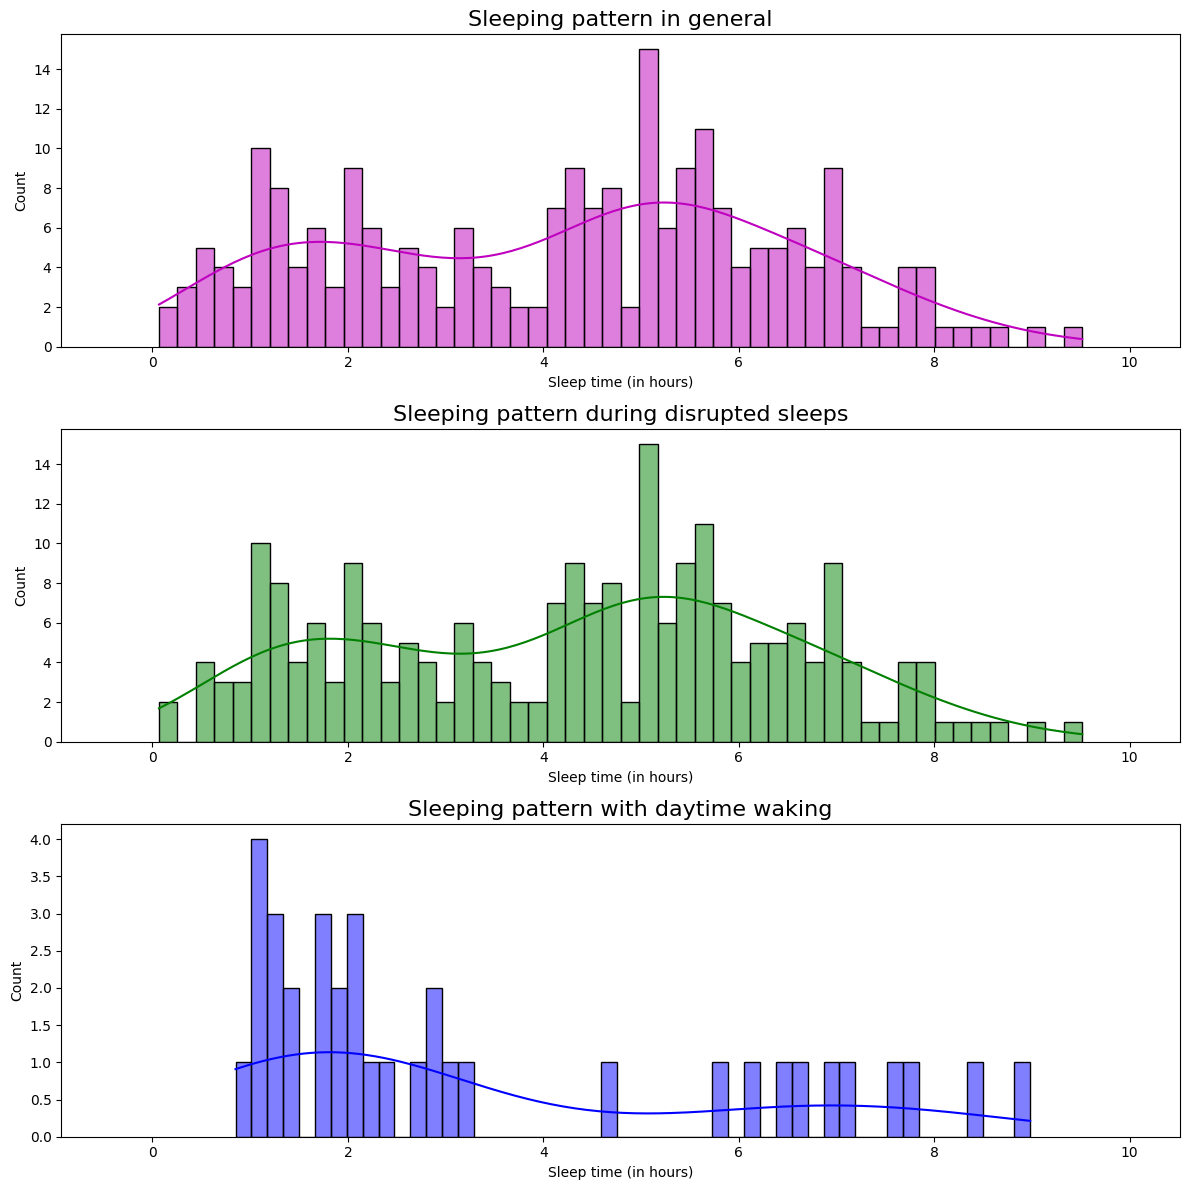

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# 1. Distribution of all sleep durations
ax1 = plt.subplot(311)
sns.histplot(daily_sleep['total_sleep_duration'], color="m", bins=50, kde=True, ax=ax1)
ax1.set_xlim(daily_sleep['total_sleep_duration'].min()-1,
             daily_sleep['total_sleep_duration'].max()+1)
ax1.set_xlabel('Sleep time (in hours)')
ax1.set_title('Sleeping pattern in general', size=16)

# 2. Disrupted sleep
ax2 = plt.subplot(312)
sns.histplot(daily_sleep[daily_sleep.Disrupted == 1]['total_sleep_duration'],
             color="g", bins=50, kde=True, ax=ax2)
ax2.set_xlim(daily_sleep['total_sleep_duration'].min()-1,
             daily_sleep['total_sleep_duration'].max()+1)
ax2.set_xlabel('Sleep time (in hours)')
ax2.set_title('Sleeping pattern during disrupted sleeps', size=16)

# 3. Daytime waking hours (10am – 7pm)
ax3 = plt.subplot(313)
sns.histplot(daily_sleep[(daily_sleep.latest_waking_hour >= 10) &
                         (daily_sleep.latest_waking_hour <= 19)]['total_sleep_duration'],
             color="b", bins=50, kde=True, ax=ax3)
ax3.set_xlim(daily_sleep['total_sleep_duration'].min()-1,
             daily_sleep['total_sleep_duration'].max()+1)
ax3.set_xlabel('Sleep time (in hours)')
ax3.set_title('Sleeping pattern with daytime waking', size=16)

plt.tight_layout()
plt.show()

# ======== TRACKER HEART RATE =========

In [ ]:
import pandas as pd

df = pd.read_csv('/content/tracker.heart_rate.csv',sep=',', skiprows=1, index_col=False)

# Rename column to simpler name
df.rename(columns={
    'source': 'source',
    'tag_id': 'tag_id',
    'com.samsung.health.heart_rate.create_sh_ver': 'create_sh_ver',
    'com.samsung.health.heart_rate.heart_beat_count': 'heart_beat_count',
    'com.samsung.health.heart_rate.start_time': 'start_time',
    'com.samsung.health.heart_rate.custom': 'custom',
    'com.samsung.health.heart_rate.binning_data': 'binning_data',
    'com.samsung.health.heart_rate.modify_sh_ver': 'modify_sh_ver',
    'com.samsung.health.heart_rate.update_time': 'update_time',
    'com.samsung.health.heart_rate.create_time': 'create_time',
    'com.samsung.health.heart_rate.client_data_id': 'client_data_id',
    'com.samsung.health.heart_rate.max': 'max',
    'com.samsung.health.heart_rate.min': 'min',
    'com.samsung.health.heart_rate.client_data_ver': 'client_data_ver',
    'com.samsung.health.heart_rate.time_offset': 'time_offset',
    'com.samsung.health.heart_rate.deviceuuid': 'deviceuuid',
    'com.samsung.health.heart_rate.comment': 'comment',
    'com.samsung.health.heart_rate.pkg_name': 'pkg_name',
    'com.samsung.health.heart_rate.end_time': 'end_time',
    'com.samsung.health.heart_rate.datauuid': 'datauuid',
    'com.samsung.health.heart_rate.heart_rate': 'heart_rate'
}, inplace=True)

print(df.head(4))

   source  tag_id  create_sh_ver  heart_beat_count               start_time  \
0     NaN   20000            NaN                 0  2021-03-28 17:55:39.422   
1     NaN   21310            NaN                 0  2020-02-13 23:48:52.238   
2     NaN   21000            NaN                 0  2019-05-12 08:25:50.550   
3     NaN   20000            NaN                 0  2020-08-04 01:38:00.855   

   custom binning_data  modify_sh_ver              update_time  \
0     NaN          NaN            NaN  2021-03-28 17:55:45.003   
1     NaN          NaN            NaN  2020-02-13 23:49:00.610   
2     NaN          NaN            NaN  2019-05-12 08:26:13.027   
3     NaN          NaN            NaN  2020-08-04 01:38:42.057   

               create_time  ...    max    min  client_data_ver  time_offset  \
0  2021-03-28 17:55:45.003  ...   78.0   78.0              NaN     UTC+0100   
1  2020-02-13 23:49:00.610  ...  165.0  165.0              NaN     UTC+0700   
2  2019-05-12 08:26:13.027  ...  103

In [ ]:
# check for deviceuuid unique name
unique_devices = df['deviceuuid'].nunique()
print(df['deviceuuid'].unique())

['SKF4LSPdEJ' 'lvlxdGoupB' 'WJC3AJvTjh' 'd7hSj8xDp1']


In [ ]:
# 1.remove empty columns
df = df.drop(columns=['client_data_id','source','create_sh_ver','custom','binning_data','modify_sh_ver','comment','pkg_name','client_data_ver'])

In [ ]:
# Convert all column o datetiime format before sorting
datetime_cols = ['update_time', 'start_time', 'create_time','end_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# arrange based on update_time
df.sort_values(by='update_time', inplace=True)

# Reset index lepas susun
df.reset_index(drop=True, inplace=True)

df.info()
print(df.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16579 entries, 0 to 16578
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tag_id            16579 non-null  int64         
 1   heart_beat_count  16579 non-null  int64         
 2   start_time        16579 non-null  datetime64[ns]
 3   update_time       16579 non-null  datetime64[ns]
 4   create_time       16579 non-null  datetime64[ns]
 5   max               5525 non-null   float64       
 6   min               5525 non-null   float64       
 7   time_offset       16579 non-null  object        
 8   deviceuuid        16579 non-null  object        
 9   end_time          16579 non-null  datetime64[ns]
 10  datauuid          16579 non-null  object        
 11  heart_rate        16579 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(2), object(3)
memory usage: 1.5+ MB
   tag_id  heart_beat_count              start_time   

/tmp/ipython-input-3124939538.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


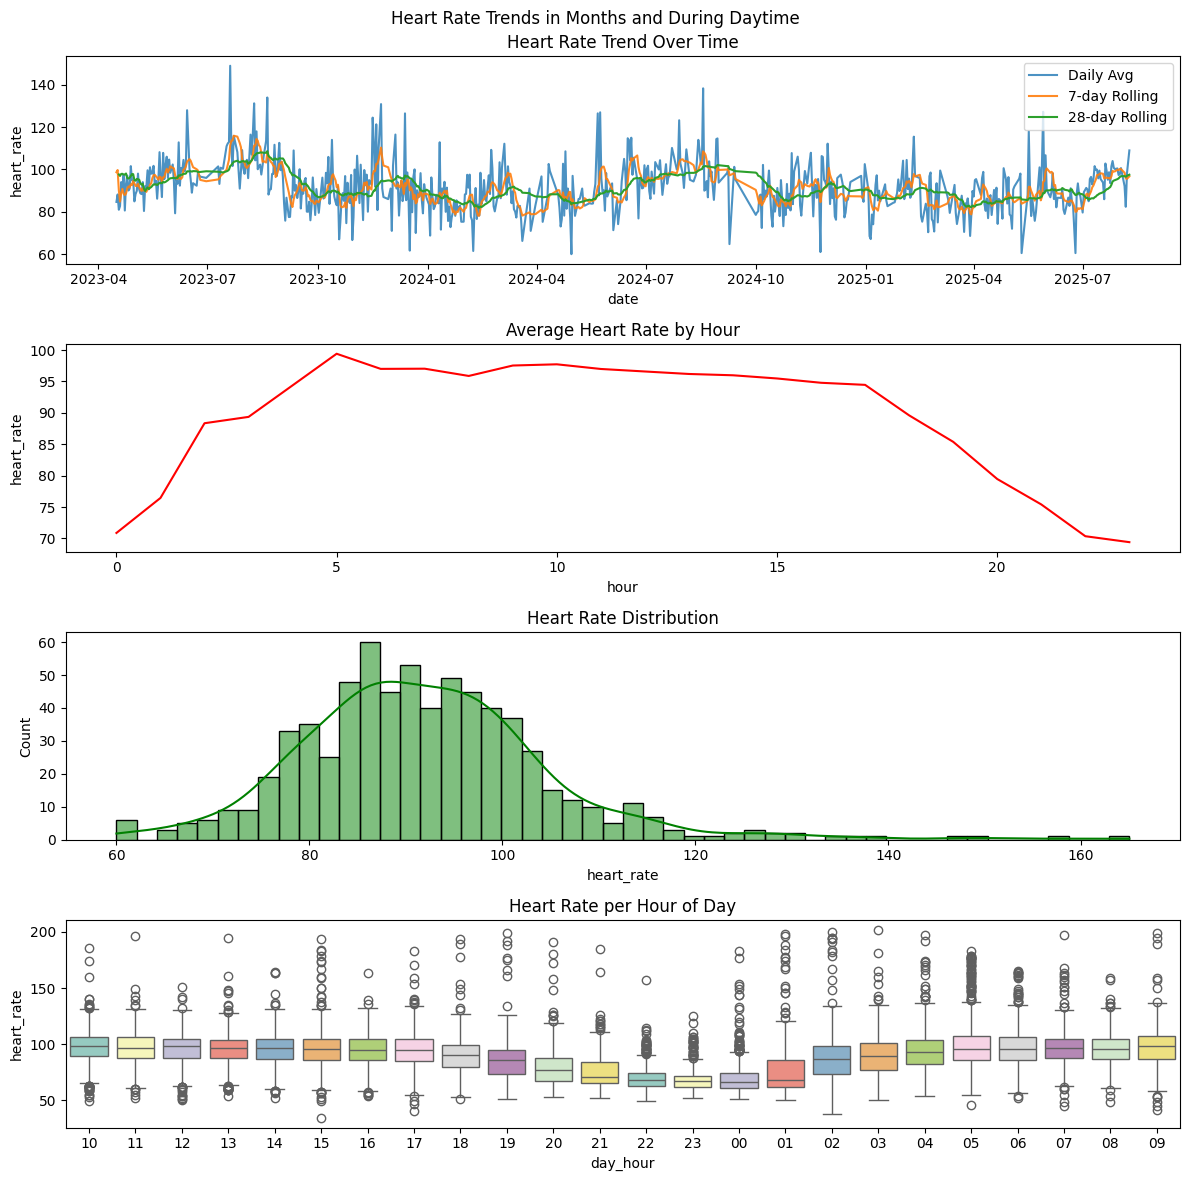

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# 2. Extract date & hour
df['date'] = df['update_time'].dt.date
df['hour'] = df['update_time'].dt.hour

# 3. Daily average HR
heart_year = df[['date', 'heart_rate']].groupby('date').mean().reset_index()

# 4. Rolling mean (7 hari & 28 hari)
heart_year['weekly_mean'] = heart_year['heart_rate'].rolling(window=7).mean()
heart_year['four_week_mean'] = heart_year['heart_rate'].rolling(window=28).mean()

# 5. Plot
plt.figure(figsize=(12,12))

# --- Plot 1: Trend ikut tarikh ---
ax1 = plt.subplot(411)
sns.lineplot(
    x="date", y="heart_rate",
    data=heart_year[heart_year['date'] > date(2023,4,1)],
    alpha=0.8, label='Daily Avg'
)
sns.lineplot(
    x="date", y="weekly_mean",
    data=heart_year[heart_year['date'] > date(2023,4,1)],
    alpha=0.9, label='7-day Rolling'
)
sns.lineplot(
    x="date", y="four_week_mean",
    data=heart_year[heart_year['date'] > date(2023,4,1)],
    alpha=1, label='28-day Rolling'
)
ax1.set_title("Heart Rate Trend Over Time")
ax1.legend()

# --- Plot 2: Average ikut jam ---
heart_day = df[['hour', 'heart_rate']].groupby('hour').mean().reset_index()
ax2 = plt.subplot(412)
sns.lineplot(x="hour", y="heart_rate", data=heart_day, alpha=1, color="red")
ax2.set_title("Average Heart Rate by Hour")

# --- Plot 3: Distribution HR ---
ax3 = plt.subplot(413)
sns.histplot(heart_year['heart_rate'], bins=50, color='g', kde=True)
ax3.set_title("Heart Rate Distribution")

# --- Plot 4: Boxplot ikut jam ---
df['day_hour'] = df['update_time'].dt.strftime('%H')
ax4 = plt.subplot(414)
sns.boxplot(
    x="day_hour", y="heart_rate",
    data=df[df['date'] > date(2023,4,1)], palette="Set3"
)
ax4.set_title("Heart Rate per Hour of Day")

plt.suptitle("Heart Rate Trends in Months and During Daytime")
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("cleaned_tracker.heart_rate.csv", index=False)

In [ ]:
# ==========================
# 1. INSTALL & IMPORT
# ==========================
!pip install plotly pandas
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ==========================
# 2. LOAD DATA
# ==========================
# Ganti dengan path dataset kau
df = pd.read_csv("/content/cleaned_tracker.heart_rate.csv")

# Pastikan format datetime betul
df['update_time'] = pd.to_datetime(df['update_time'])
df['date'] = df['update_time'].dt.date
df['hour'] = df['update_time'].dt.hour

# Buang NaN heart_rate
df = df.dropna(subset=['heart_rate'])

# ==========================
# 3. DEVICE LIST
# ==========================
devices = sorted(df['deviceuuid'].unique())

# ==========================
# 4. CREATE FIGURE SUBPLOTS
# ==========================
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Daily Heart Rate Trend", "Hourly Average", "Heart Rate Distribution"),
    vertical_spacing=0.15
)

# Kita simpan semua trace ikut device
for idx, device in enumerate(devices):
    device_df = df[df['deviceuuid'] == device]

    # 1. Line chart - Daily trend
    daily_avg = device_df.groupby('date')['heart_rate'].mean().reset_index()
    fig.add_trace(
        go.Scatter(
            x=daily_avg['date'],
            y=daily_avg['heart_rate'],
            mode='lines+markers',
            name=f"{device} - Daily",
            visible=(idx == 0)  # show only first device initially
        ), row=1, col=1
    )

    # 2. Bar chart - Hourly avg
    hourly_avg = device_df.groupby('hour')['heart_rate'].mean().reset_index()
    fig.add_trace(
        go.Bar(
            x=hourly_avg['hour'],
            y=hourly_avg['heart_rate'],
            name=f"{device} - Hourly",
            visible=(idx == 0)
        ), row=2, col=1
    )

    # 3. Histogram - Distribution
    fig.add_trace(
        go.Histogram(
            x=device_df['heart_rate'],
            name=f"{device} - Dist",
            nbinsx=30,
            visible=(idx == 0)
        ), row=3, col=1
    )

# ==========================
# 5. BUTTONS (LONG HORIZONTAL)
# ==========================
buttons = []
for idx, device in enumerate(devices):
    visible_list = [False] * (len(devices) * 3)  # 3 charts per device
    visible_list[idx] = True           # daily trend
    visible_list[idx + len(devices)] = True  # hourly
    visible_list[idx + 2*len(devices)] = True  # distribution

    buttons.append(
        dict(
            label=device,
            method="update",
            args=[{"visible": visible_list},
                  {"title": f"Heart Rate Dashboard - Device {device}"}]
        )
    )

# ==========================
# 6. LAYOUT UPDATE
# ==========================
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=buttons,
            x=0.5,
            y=1.2,
            xanchor="center",
            yanchor="top"
        )
    ],
    height=900,
    showlegend=False,
    template="plotly_white"
)

# ==========================
# 7. SHOW FIG
# ==========================
fig.show()

In [14]:
import pandas as pd

df = pd.read_csv('/content/stress.csv', sep=',', skiprows=1, index_col=False)

print(df.head(5))

   create_sh_ver               start_time  \
0            NaN  2019-06-26 08:57:15.238   
1            NaN  2019-05-25 03:12:52.299   
2            NaN  2019-11-11 17:23:48.949   
3            NaN  2020-02-05 08:29:12.384   
4            NaN  2019-05-25 03:13:43.553   

                                             custom binning_data  tag_id  \
0  7f787cda-d0ba-4631-abfa-6ed7d78a37cc.custom.json          NaN   10002   
1  ed126a41-6ecd-4710-bd2d-7b09fef7568f.custom.json          NaN   10002   
2  3f946df4-30f2-4372-99b4-7c847cd34e71.custom.json          NaN   10000   
3  0082c500-cc91-4655-860a-054fc17b1026.custom.json          NaN   10000   
4  ef6d8eaa-0831-47d6-9f70-b75fdf0c1a6a.custom.json          NaN   10002   

   modify_sh_ver              update_time              create_time   max  \
0            NaN  2019-06-26 08:57:20.182  2019-06-26 08:57:20.182  50.0   
1            NaN  2019-05-25 03:13:02.982  2019-05-25 03:13:02.982   0.0   
2            NaN  2019-11-11 17:23:54.042  2

In [15]:
# 1.remove empty columns
df = df.drop(columns=['create_sh_ver','custom','binning_data','modify_sh_ver','comment','pkg_name','datauuid'])

In [16]:
# Convert all column o datetiime format before sorting
datetime_cols = ['update_time', 'start_time', 'create_time','end_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# create date column using update_time
df['date'] = df['update_time'].dt.date

# arrange based on update_time
df.sort_values(by='update_time', inplace=True)

# Reset index lepas susun
#df.reset_index(drop=True, inplace=True)

df.info()
print(df.head(4))

<class 'pandas.core.frame.DataFrame'>
Index: 5003 entries, 1 to 5002
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   start_time   5003 non-null   datetime64[ns]
 1   tag_id       5003 non-null   int64         
 2   update_time  5003 non-null   datetime64[ns]
 3   create_time  5003 non-null   datetime64[ns]
 4   max          4983 non-null   float64       
 5   min          4983 non-null   float64       
 6   score        5003 non-null   float64       
 7   algorithm    5 non-null      float64       
 8   time_offset  5003 non-null   object        
 9   deviceuuid   5003 non-null   object        
 10  end_time     5003 non-null   datetime64[ns]
 11  date         5003 non-null   object        
dtypes: datetime64[ns](4), float64(4), int64(1), object(3)
memory usage: 508.1+ KB
               start_time  tag_id             update_time  \
1 2019-05-25 03:12:52.299   10002 2019-05-25 03:13:02.982   
4 2019-

In [17]:
stress_year = df[['date','max']].sort_values(by = 'date').groupby('date').mean().reset_index()
weekly_mean=stress_year['max'].rolling(window=7).mean()
stress_year['weekly_mean']=weekly_mean
fourweekmean=stress_year['max'].rolling(window=28).mean()
stress_year['four_week_mean']=fourweekmean

In [19]:
stress_year.head(100)

,date,max,weekly_mean,four_week_mean
0,2019-05-25,0.000000,NaN,NaN
1,2019-06-26,50.000000,NaN,NaN
2,2019-11-11,2.000000,NaN,NaN
3,2020-02-05,0.000000,NaN,NaN
4,2023-04-16,NaN,NaN,NaN
...,...,...,...,...
95,2024-02-03,93.600000,82.534014,84.402339
96,2024-02-04,93.000000,85.365182,84.819006
97,2024-02-05,66.444444,82.847722,83.788451
98,2024-02-06,97.888889,86.260421,84.259929


/tmp/ipython-input-278354738.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weekday", y="max", data=stress_year, palette="Set3", order=order, ax=ax3)


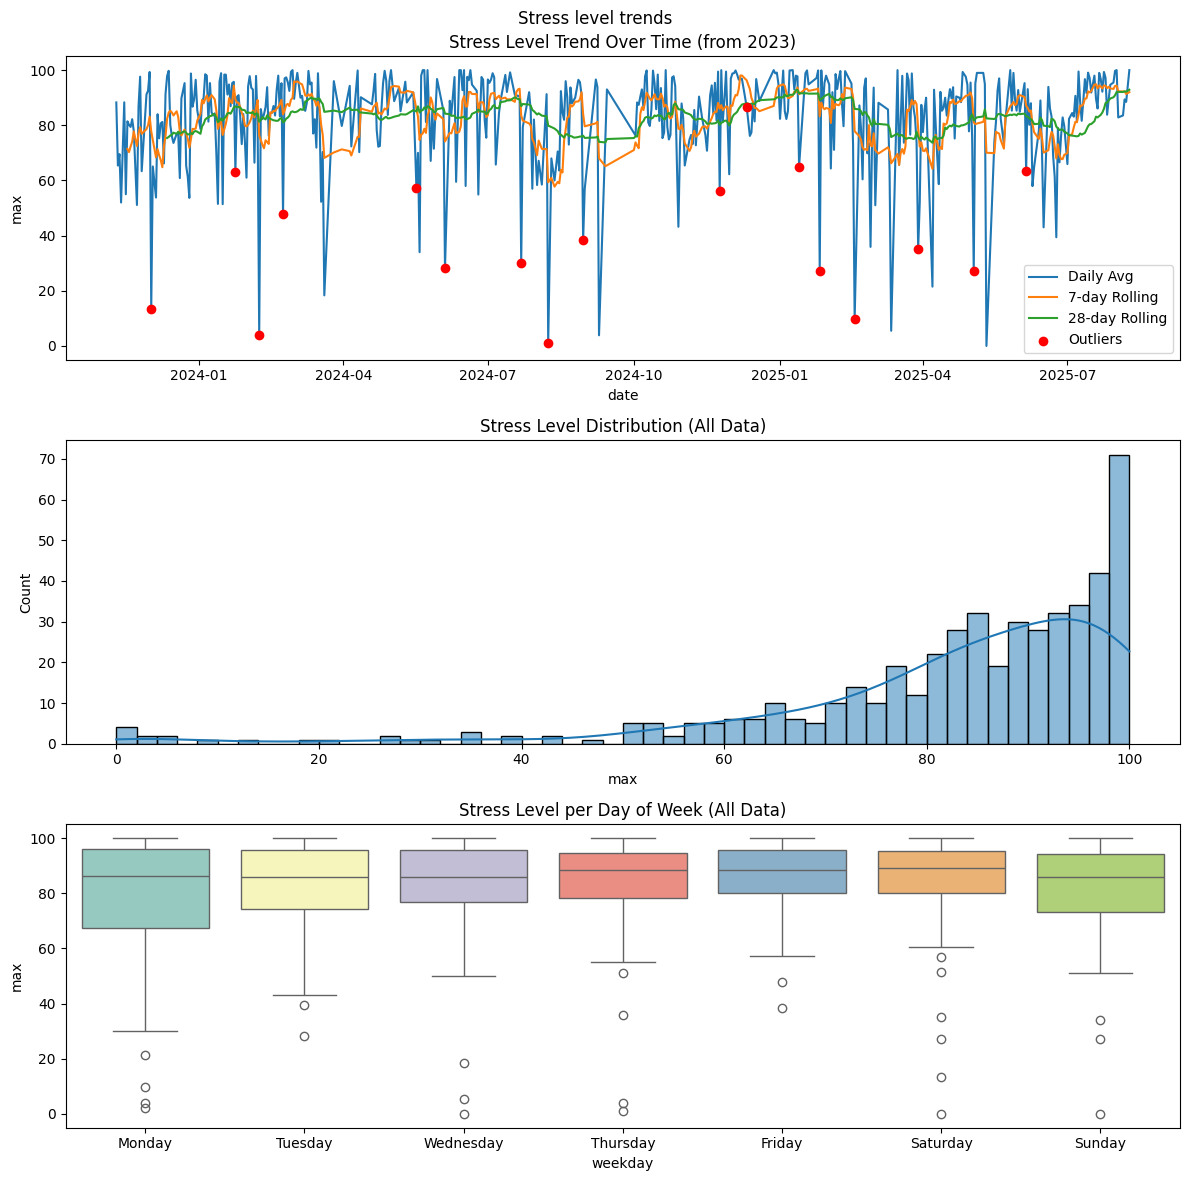

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Filter data from 2023 onwards for plotting the trend
stress_year_plot = stress_year[stress_year['date'].dt.year >= 2023].copy()


# 1. Line plot for stress trends over time (from 2023 onwards)
ax1 = plt.subplot(311)
sns.lineplot(x='date', y='max', data=stress_year_plot, ax=ax1, label='Daily Avg')
sns.lineplot(x='date', y='weekly_mean', data=stress_year_plot, ax=ax1, label='7-day Rolling')
sns.lineplot(x='date', y='four_week_mean', data=stress_year_plot, ax=ax1, label='28-day Rolling')
ax1.set_title("Stress Level Trend Over Time (from 2023)")
ax1.legend()

# Highlight outliers on the line plot
# Ensure outliers DataFrame has no NaN values in 'max' before plotting
outliers_plot = outliers.dropna(subset=['max']).copy()
ax1.scatter(outliers_plot['date'], outliers_plot['max'], color='red', label='Outliers', zorder=5)
ax1.legend()


# 2. Distribution of stress scores (using all data)
ax2 = plt.subplot(312)
sns.histplot(stress_year['max'], bins=50, kde=True, ax=ax2)
ax2.set_title("Stress Level Distribution (All Data)")


# 3. Boxplot of stress scores by weekday (using all data)
# Ensure the 'date' column is datetime and 'weekday' is mapped
stress_year['date'] = pd.to_datetime(stress_year['date'])
stress_year['weekday'] = stress_year['date'].dt.dayofweek
stress_year['weekday'] = stress_year['weekday'].map({0:"Monday", 1: "Tuesday", 2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday", 6:"Sunday"})
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax3 = plt.subplot(313)
sns.boxplot(x="weekday", y="max", data=stress_year, palette="Set3", order=order, ax=ax3)
ax3.set_title("Stress Level per Day of Week (All Data)")

plt.suptitle("Stress level trends")
plt.tight_layout()
plt.show()

## -- STEP DAILY TREND --

In [ ]:
import pandas as pd

# Step 1: Baca data dengan betul (skiprows mungkin tak perlu kalau header betul)
df = pd.read_csv('/content/step_daily_trend.csv', sep=',',skiprows=1)

df = df.reset_index(drop=True)
print(df.head(5))

              binning_data              update_time  \
0  2023-06-07 00:58:38.489  2023-06-07 00:58:38.489   
1  2023-06-07 00:58:38.489  2023-06-07 00:58:38.489   
2  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490   
3  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490   
4  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490   

                   create_time  source_pkg_name  source_type     count  \
0  com.sec.android.app.shealth                0          326  1.583333   
1  com.sec.android.app.shealth                0         5059  1.722222   
2  com.sec.android.app.shealth                0         2512  1.754916   
3  com.sec.android.app.shealth                0         1205  1.979554   
4  com.sec.android.app.shealth                0          180  1.591247   

        speed    distance     calorie                   deviceuuid  \
0   248.58000   13.120000  g1H1gSpl4L  com.sec.android.app.shealth   
1  3778.67000  183.329990  g1H1gSpl4L  com.sec.android.app.shealth   
2  1895.69000 

In [ ]:
# Convert semua kolum datetime yang nak guna sebelum sort
datetime_cols = ['binning_data', 'update_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df=df.drop(columns=['create_time','deviceuuid','pkg_name','day_time'])
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   binning_data     5630 non-null   datetime64[ns]
 1   update_time      5630 non-null   datetime64[ns]
 2   source_pkg_name  5630 non-null   int64         
 3   source_type      5630 non-null   int64         
 4   count            5630 non-null   float64       
 5   speed            5630 non-null   float64       
 6   distance         5630 non-null   float64       
 7   calorie          5630 non-null   object        
 8   datauuid         5630 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(1)
memory usage: 396.0+ KB
             binning_data             update_time  source_pkg_name  \
0 2023-06-07 00:58:38.489 2023-06-07 00:58:38.489                0   
1 2023-06-07 00:58:38.489 2023-06-07 00:58:38.489                0   
2 2023-06-07 00:58

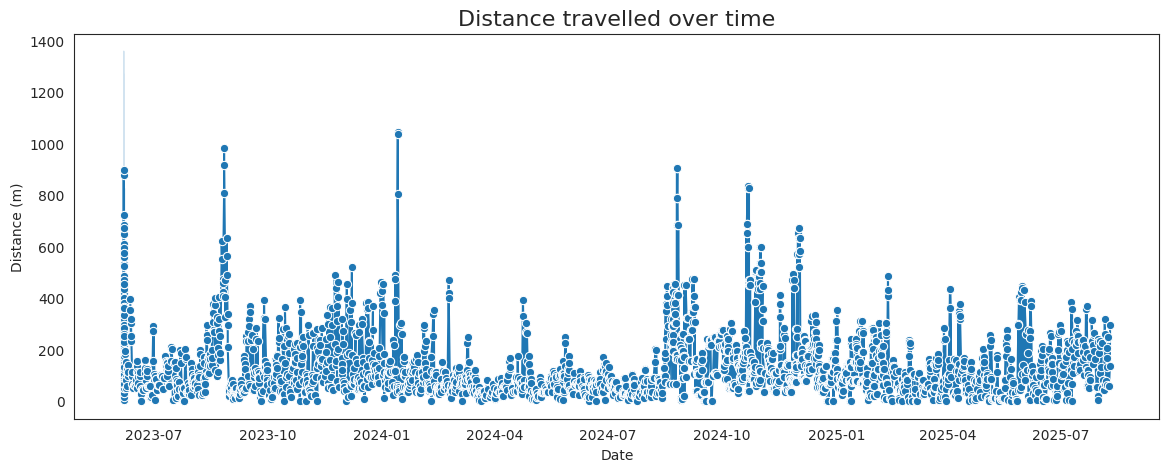

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(x='binning_data', y='distance', data=df, marker='o')
plt.title("Distance travelled over time", size=16)
plt.xlabel("Date")
plt.ylabel("Distance (m)")
plt.show()


In [ ]:
total_calories = df1['calorie'].sum()
print(f"Total calories burnt (kcal): {total_calories:.2f}")

Total calories burnt (kcal): 0.00


In [ ]:
import pandas as pd

# Step 1: Baca data dengan betul (skiprows mungkin tak perlu kalau header betul)
df = pd.read_csv('/content/calories_burned.csv', sep=',',skiprows=1)

df = df.rename(columns={
    'active_calories_goal': 'cal_goal',
    'version': 'version',
    'extra_data': 'extra_data',
    'exercise_calories': 'exercise_cal',
    'total_exercise_calories': 'total_exercise_cal',
    'com.samsung.shealth.calories_burned.create_sh_ver': 'create_sh_ver',
    'com.samsung.shealth.calories_burned.tef_calorie': 'tef_cal',
    'com.samsung.shealth.calories_burned.active_time': 'active_time',
    'com.samsung.shealth.calories_burned.rest_calorie': 'rest_cal',
    'com.samsung.shealth.calories_burned.modify_sh_ver': 'modify_sh_ver',
    'com.samsung.shealth.calories_burned.update_time': 'update_time',
    'com.samsung.shealth.calories_burned.create_time': 'create_time',
    'com.samsung.shealth.calories_burned.active_calorie': 'active_cal',
    'com.samsung.shealth.calories_burned.deviceuuid': 'deviceuuid',
    'com.samsung.shealth.calories_burned.pkg_name': 'pkg_name',
    'com.samsung.shealth.calories_burned.datauuid': 'datauuid',
    'com.samsung.shealth.calories_burned.day_time': 'day_time'
})

df = df.reset_index(drop=True)
print(df.head(5))

   cal_goal                                            version  extra_data  \
0       NaN  42a474ad-6795-437c-a128-d026d5ca5dbe.extra_dat...         NaN   
1       NaN  8c919fe0-f7ac-44f0-b5c9-3888a951e1e8.extra_dat...         NaN   
2       NaN  6ea8c002-eece-474c-aac0-51996d096955.extra_dat...         NaN   
3       NaN  125dcf0e-55a0-4cef-8e01-7cd64a0555fa.extra_dat...         NaN   
4       NaN  35189f75-190b-4f0b-a3eb-fc0bc41a6a35.extra_dat...         NaN   

   exercise_cal  total_exercise_cal  create_sh_ver  tef_cal  active_time  \
0           NaN                 NaN            0.0  2206610    1835.4247   
1           NaN                 NaN            0.0  6872445    1747.2732   
2           NaN                 NaN            0.0  8019295    1727.2263   
3           NaN                 NaN            0.0   491579    1878.4573   
4           NaN                 NaN            0.0  4313979    1794.8773   

   rest_cal            modify_sh_ver              update_time  create_time

In [ ]:
df=df.drop(columns=['deviceuuid','cal_goal','version','extra_data','exercise_cal','total_exercise_cal','rest_cal','active_cal','pkg_name'])

datetime_cols = ['update_time', 'modify_sh_ver']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['date'] = df['update_time'].dt.date

print(df.head())

   create_sh_ver  tef_cal  active_time           modify_sh_ver  \
0            0.0  2206610    1835.4247 2021-11-29 05:17:32.824   
1            0.0  6872445    1747.2732 2021-11-09 23:02:44.263   
2            0.0  8019295    1727.2263 2021-11-10 22:15:34.823   
3            0.0   491579    1878.4573 2021-11-10 22:15:35.592   
4            0.0  4313979    1794.8773 2021-11-10 22:15:36.778   

              update_time  create_time       datauuid  day_time        date  
0 2021-11-09 23:02:12.065    147.30002  1636502400000       NaN  2021-11-09  
1 2021-11-09 23:02:13.431    480.22034  1634169600000       NaN  2021-11-09  
2 2021-11-09 23:02:13.466    571.48004  1634256000000       NaN  2021-11-09  
3 2021-11-09 23:02:13.501     32.20000  1634428800000       NaN  2021-11-09  
4 2021-11-09 23:02:13.564    293.54562  1634688000000       NaN  2021-11-09  


## ======== TRACKER PEDOMETER =======

In [ ]:
import pandas as pd

df = pd.read_csv(
    '/content/tracker.pedometer_step_count.csv',
    sep=',',
    skiprows=1,
    header=0,
    index_col=False  # Pastikan tiada column jadi index
)

# Rename ke nama lebih ringkas
df.rename(columns={
    'duration': 'duration',
    'version_code': 'version_code',
    'run_step': 'run_step',
    'walk_step': 'walk_step',
    'com.samsung.health.step_count.start_time': 'start_time',
    'com.samsung.health.step_count.sample_position_type': 'sample_position_type',
    'com.samsung.health.step_count.custom': 'custom',
    'com.samsung.health.step_count.update_time': 'update_time',
    'com.samsung.health.step_count.create_time': 'create_time',
    'com.samsung.health.step_count.count': 'count',
    'com.samsung.health.step_count.speed': 'speed',
    'com.samsung.health.step_count.distance': 'distance',
    'com.samsung.health.step_count.calorie': 'calorie',
    'com.samsung.health.step_count.time_offset': 'time_offset',
    'com.samsung.health.step_count.deviceuuid': 'device_uuid',
    'com.samsung.health.step_count.pkg_name': 'pkg_name',
    'com.samsung.health.step_count.end_time': 'end_time',
    'com.samsung.health.step_count.datauuid': 'data_uuid'
}, inplace=True)

print(df.head())

   duration  version_code  run_step  walk_step               start_time  \
0      8735             4         0         15  2025-07-05 16:05:00.000   
1      7890             4         0         18  2025-07-05 16:07:00.000   
2      8025             4         0         13  2025-07-05 16:39:00.000   
3      9857             4         0         16  2025-07-05 16:40:00.000   
4     21516             4         0         40  2025-07-06 01:14:00.000   

   sample_position_type  custom              update_time  \
0                   NaN     NaN  2025-07-05 16:05:17.464   
1                   NaN     NaN  2025-07-05 16:07:22.744   
2                   NaN     NaN  2025-07-05 16:39:09.947   
3                   NaN     NaN  2025-07-05 16:44:03.353   
4                   NaN     NaN  2025-07-06 01:15:02.160   

               create_time  count     speed   distance  calorie time_offset  \
0  2025-07-05 16:05:14.436     15  1.259208  11.000000     0.58    UTC+0800   
1  2025-07-05 16:07:18.330    

In [ ]:
df=df.drop(columns=['pkg_name', 'time_offset','sample_position_type','custom','datauuid'])
df = df.reset_index(drop=True)

# Convert kolum datetime yang asal ke datetime64
datetime_cols = ['start_time', 'update_time', 'create_time', 'end_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

#make a date only column
df['date_only'] = pd.to_datetime(df['update_time'].dt.date)

df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6801 entries, 0 to 6800
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   duration      6801 non-null   int64         
 1   version_code  6801 non-null   int64         
 2   run_step      6801 non-null   int64         
 3   walk_step     6801 non-null   int64         
 4   start_time    6801 non-null   datetime64[ns]
 5   update_time   6801 non-null   datetime64[ns]
 6   create_time   6801 non-null   datetime64[ns]
 7   count         6801 non-null   int64         
 8   speed         6801 non-null   float64       
 9   distance      6801 non-null   float64       
 10  calorie       6801 non-null   float64       
 11  device_uuid   6801 non-null   object        
 12  end_time      6801 non-null   datetime64[ns]
 13  data_uuid     6801 non-null   object        
 14  date_only     6801 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(3), int6

In [ ]:
df.to_csv("cleaned_tracker_pedometer.csv", index=False)

# ===============================================================================

In [ ]:
# Pasang library yang perlu
!pip install -q streamlit pyngrok plotly pandas

# Upload CSV kalau belum ada dalam /content
from google.colab import files
print("Kalau CSV kau dah ada /content/cleaned_tracker_pedometer.csv, boleh cancel upload.")
uploaded = files.upload()


Kalau CSV kau dah ada /content/cleaned_tracker_pedometer.csv, boleh cancel upload.


Saving cleaned_tracker_pedometer.csv to cleaned_tracker_pedometer.csv


In [ ]:
# SEL C
from getpass import getpass
import time

token = getpass("Paste your ngrok authtoken (from https://dashboard.ngrok.com): ").strip()
if not token:
    print("No token entered — you must provide ngrok token to expose app from Colab.")
else:
    !pip install -q pyngrok
    from pyngrok import ngrok, conf
    ngrok.set_auth_token(token)
    ngrok.kill()

    # start streamlit app in background
    get_ipython().system_raw("streamlit run app.py --server.port 8501 &")

    # tunggu 10-15 saat bagi streamlit sempat load
    time.sleep(12)

    # open tunnel
    public_url = ngrok.connect(8501)
    print("Open this URL in your browser (may take a few seconds to start):")
    print(public_url)


KeyboardInterrupt: Interrupted by user

In [ ]:
!pip install -q streamlit pyngrok plotly pandas


In [ ]:
!streamlit --version

Streamlit, version 1.48.0


# ================ STEP DAILY COUNT ====================

In [ ]:
import pandas as pd

df=pd.read_csv('/content/step_daily_trend.csv', sep=',', skiprows=1, index_col=False)
df = df.drop(df.columns[0], axis=1)
print(df.head())

               update_time              create_time  \
0  2023-06-07 00:58:38.489  2023-06-07 00:58:38.489   
1  2023-06-07 00:58:38.489  2023-06-07 00:58:38.489   
2  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490   
3  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490   
4  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490   

               source_pkg_name  source_type  count     speed    distance  \
0  com.sec.android.app.shealth            0    326  1.583333   248.58000   
1  com.sec.android.app.shealth            0   5059  1.722222  3778.67000   
2  com.sec.android.app.shealth            0   2512  1.754916  1895.69000   
3  com.sec.android.app.shealth            0   1205  1.979554   917.17993   
4  com.sec.android.app.shealth            0    180  1.591247   121.04000   

      calorie  deviceuuid                     pkg_name  \
0   13.120000  g1H1gSpl4L  com.sec.android.app.shealth   
1  183.329990  g1H1gSpl4L  com.sec.android.app.shealth   
2   99.600000  g1H1gSpl4L  com.sec.and

In [ ]:
df = df.drop(columns=['source_pkg_name','pkg_name'])
print(df.head())

               update_time              create_time  source_type  count  \
0  2023-06-07 00:58:38.489  2023-06-07 00:58:38.489            0    326   
1  2023-06-07 00:58:38.489  2023-06-07 00:58:38.489            0   5059   
2  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490            0   2512   
3  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490            0   1205   
4  2023-06-07 00:58:38.490  2023-06-07 00:58:38.490            0    180   

      speed    distance     calorie  deviceuuid  \
0  1.583333   248.58000   13.120000  g1H1gSpl4L   
1  1.722222  3778.67000  183.329990  g1H1gSpl4L   
2  1.754916  1895.69000   99.600000  g1H1gSpl4L   
3  1.979554   917.17993   48.799995  g1H1gSpl4L   
4  1.591247   121.04000    7.810000  g1H1gSpl4L   

                               datauuid       day_time  
0  233b7a72-d955-4b9d-bd80-a1d87643ba4d  1557619200000  
1  c34716aa-3712-4f92-962c-a2b12fb0d7eb  1557705600000  
2  518bac6d-9581-4811-8875-623cfe907a0a  1557792000000  
3  32db4745-d1

In [ ]:
# Convert kolum datetime yang asal ke datetime64
datetime_cols = ['update_time', 'create_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   update_time  5630 non-null   datetime64[ns]
 1   create_time  5630 non-null   datetime64[ns]
 2   source_type  5630 non-null   int64         
 3   count        5630 non-null   int64         
 4   speed        5630 non-null   float64       
 5   distance     5630 non-null   float64       
 6   calorie      5630 non-null   float64       
 7   deviceuuid   5630 non-null   object        
 8   datauuid     5630 non-null   object        
 9   day_time     5630 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 440.0+ KB
              update_time             create_time  source_type  count  \
0 2023-06-07 00:58:38.489 2023-06-07 00:58:38.489            0    326   
1 2023-06-07 00:58:38.489 2023-06-07 00:58:38.489            0   5059   
2 2

In [ ]:
# Find the minimum and maximum dates in the 'update_time' column
min_date = df['update_time'].min()
max_date = df['update_time'].max()

# Print the date range
print(f"Date range: {min_date.date()} to {max_date.date()}")

Date range: 2023-06-07 to 2025-08-09


In [ ]:
unique_devices = df['deviceuuid'].nunique()
print(f"Unique deviceuuid: {unique_devices}")
print(df['deviceuuid'].unique())


Unique deviceuuid: 4
['g1H1gSpl4L' 'VfS0qUERdZ' 'WJC3AJvTjh' 'QgPjQWpksV']


In [ ]:
# Filter untuk deviceuuid QgPjQWpksV sahaja
df = df[df['deviceuuid'] == 'VfS0qUERdZ'].copy()

# 1. Convert date
df['date_only'] = pd.to_datetime(df['update_time']).dt.date

# 3. Kira increment steps ikut date_only
df['prev_count'] = df.groupby('date_only')['count'].shift(1)
df['step_diff'] = df['count'] - df['prev_count']

# 4. Kalau step_diff negatif → reset counter
df.loc[df['step_diff'] < 0, 'step_diff'] = 0

# 5. Sum per day
daily_steps = df.groupby('date_only')['step_diff'].sum().reset_index()
daily_steps.columns = ['date_only', 'total_steps']

# 6. Filter outlier (> 60k langkah)
daily_steps = daily_steps[daily_steps['total_steps'] <= 60000]

# 7. Merge balik ke df asal
df = df.merge(daily_steps, on='date_only', how='left')

print(daily_steps)
print(df.head(5))


      date_only  total_steps
1    2023-06-08          0.0
2    2023-06-09          0.0
3    2023-06-10          0.0
4    2023-06-12          0.0
5    2023-06-13          0.0
..          ...          ...
668  2025-08-04          0.0
669  2025-08-05          0.0
670  2025-08-06          0.0
671  2025-08-08          0.0
672  2025-08-09          0.0

[672 rows x 2 columns]
              update_time             create_time  source_type  count  \
0 2023-06-07 00:58:38.847 2023-06-07 00:58:38.847           -2    326   
1 2023-06-07 00:58:38.847 2023-06-07 00:58:38.847           -2   5059   
2 2023-06-07 00:58:38.847 2023-06-07 00:58:38.847           -2   2512   
3 2023-06-07 00:58:38.848 2023-06-07 00:58:38.848           -2   1205   
4 2023-06-07 00:58:38.848 2023-06-07 00:58:38.848           -2    180   

      speed    distance     calorie  deviceuuid  \
0  1.249863   248.58000   13.120000  VfS0qUERdZ   
1  1.335738  3778.67000  183.329990  VfS0qUERdZ   
2  1.312925  1895.69000   99.600000 

In [ ]:
total_19july = daily_steps.loc[daily_steps['date_only'] == datetime(2025, 7, 19).date(), 'total_steps']
print(total_19july)


Series([], Name: total_steps, dtype: float64)


In [ ]:
# Convert update_time ke datetime, then ambil tarikh je
df['date_only'] = pd.to_datetime(df['update_time']).dt.date

# Buang tarikh yang rosak
df = df[df['date_only'] != pd.to_datetime("2023-06-07").date()]

# Kira increment steps (bukan terus guna count)
df['prev_count'] = df.groupby('date_only')['count'].shift(1)
df['step_diff'] = df['count'] - df['prev_count']

# Kalau step_diff negatif → reset counter
df.loc[df['step_diff'] < 0, 'step_diff'] = 0

# Sum per day
daily_steps = df.groupby('date_only')['step_diff'].sum().reset_index()
daily_steps.columns = ['date_only', 'total_steps']

# Filter outlier (contoh > 60k langkah)
daily_steps = daily_steps[daily_steps['total_steps'] <= 60000]

# Merge balik total_steps ke df asal
df = df.merge(daily_steps, on='date_only', how='left')

print(daily_steps)
print(df.head(20))


      date_only  total_steps
0    2023-06-08        779.0
1    2023-06-09       1514.0
2    2023-06-10        272.0
3    2023-06-11          0.0
4    2023-06-12        426.0
..          ...          ...
786  2025-08-05          0.0
787  2025-08-06       4554.0
788  2025-08-07        245.0
789  2025-08-08          0.0
790  2025-08-09          0.0

[791 rows x 2 columns]
               update_time             create_time  source_type  count  \
0  2023-06-08 20:00:05.170 2023-06-07 20:00:03.847          103   3806   
1  2023-06-08 19:55:56.310 2023-06-08 02:50:40.348           -2   2312   
2  2023-06-08 20:00:02.406 2023-06-08 20:00:02.406            0   1270   
3  2023-06-08 20:00:05.144 2023-06-08 20:00:05.144          103   2049   
4  2023-06-09 20:00:03.154 2023-06-09 02:14:45.178           -2   3167   
5  2023-06-09 20:00:02.809 2023-06-09 20:00:02.809            0   1431   
6  2023-06-09 20:00:04.817 2023-06-09 20:00:04.817          103   2945   
7  2023-06-10 20:00:07.131 2023-06-1

In [ ]:
df.to_csv("cleaned_step_daily_trend.csv", index=False)

In [ ]:
import pandas as pd

df=pd.read_csv('/content/cleaned_step_daily_trend.csv')

In [ ]:
total_count = df['count'].sum()
print(f"Total count: {total_count}")

Total count: 20708102


In [ ]:
# Convert kolum datetime yang asal ke datetime64
datetime_cols = ['update_time', 'create_time','date_only']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   update_time  5630 non-null   datetime64[ns]
 1   create_time  5630 non-null   datetime64[ns]
 2   source_type  5630 non-null   int64         
 3   count        5630 non-null   int64         
 4   speed        5630 non-null   float64       
 5   distance     5630 non-null   float64       
 6   calorie      5630 non-null   float64       
 7   deviceuuid   5630 non-null   object        
 8   datauuid     5630 non-null   object        
 9   day_time     5630 non-null   int64         
 10  date_only    5630 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(3), object(2)
memory usage: 484.0+ KB
              update_time             create_time  source_type  count  \
0 2023-06-07 00:58:38.489 2023-06-07 00:58:38.489            0    326   
1 2023-06-07 00:58:38.489 2

In [ ]:
# Calculate daily steps by grouping by 'date_only' and summing the 'count'
daily_steps = df.groupby('date_only')['count'].sum().reset_index()

print(daily_steps.head(10))
print(daily_steps['count'].min(), daily_steps['count'].max())

   date_only     count
0 2023-06-07  12351747
1 2023-06-08      9437
2 2023-06-09      7543
3 2023-06-10      8272
4 2023-06-11      8704
5 2023-06-12     37073
6 2023-06-13      6814
7 2023-06-14      2510
8 2023-06-15      3074
9 2023-06-16      3710
40 12351747


In [ ]:
import pandas as pd

df=pd.read_csv('/content/tracker.pedometer_day_summary.csv', sep=',', skiprows=1, index_col=False)
df = df.drop(df.columns[0], axis=1)
print(df.head())

   step_count                                       binning_data  active_time  \
0       14335  75e7e49d-8d5d-4b45-adac-2e91afedb48c.binning_d...      7666910   
1          13  96157472-4812-47a5-90ec-1879f5a27ecb.binning_d...         8422   
2        1253  f415fa7f-a77d-47ba-b085-8673ce635b4c.binning_d...       722119   
3        1909  9f58144d-2b11-4572-8663-7458dcdcaa4c.binning_d...      1024043   
4         248  c307432f-0e14-42b8-a1f2-89bf5a09fc70.binning_d...       143180   

   recommendation  modify_sh_ver  run_step_count              update_time  \
0            6000            NaN              55  2019-06-08 17:23:04.293   
1            6000            NaN               0  2020-04-15 17:19:17.308   
2            6000            NaN               1  2019-05-17 15:35:22.022   
3            6000            NaN               0  2019-11-19 17:32:08.998   
4            6000            NaN               0  2020-07-04 11:07:43.287   

           source_package_name              create

In [ ]:
total_distance_km = df['distance'].sum()
print(f"Total distance travelled (km): {total_distance_km:.2f}")

Total distance travelled (km): 856517.63


In [ ]:
total_calories = df1['calorie'].sum()
print(f"Total calories burnt (kcal): {total_calories:.2f}")

Total calories burnt (kcal): 0.00


In [25]:
# Filter data from 2023 onwards
stress_year_filtered = stress_year[stress_year['date'].dt.year >= 2023].copy()

# Calculate rolling mean and standard deviation of stress levels on filtered data
window_size = 7 # You can adjust the window size as needed
stress_year_filtered['rolling_mean'] = stress_year_filtered['max'].rolling(window=window_size).mean()
stress_year_filtered['rolling_std'] = stress_year_filtered['max'].rolling(window=window_size).std()

# Identify outliers (e.g., stress level is more than 2 standard deviations away from the rolling mean)
outlier_threshold = 2 # You can adjust the threshold as needed
outliers = stress_year_filtered[
    (stress_year_filtered['max'] > stress_year_filtered['rolling_mean'] + outlier_threshold * stress_year_filtered['rolling_std']) |
    (stress_year_filtered['max'] < stress_year_filtered['rolling_mean'] - outlier_threshold * stress_year_filtered['rolling_std'])
]

print("Outlier stress levels from 2023 onwards:")
display(outliers[['date', 'max', 'rolling_mean', 'rolling_std']])

Outlier stress levels from 2023 onwards:


,date,max,rolling_mean,rolling_std
36,2023-12-02,13.500000,77.756179,30.757217
85,2024-01-24,63.181818,89.355744,12.117521
100,2024-02-08,4.000000,76.293074,33.805113
115,2024-02-23,47.818182,83.966960,16.932762
167,2024-05-17,57.400000,85.836835,13.040843
182,2024-06-04,28.200000,74.137668,22.517801
218,2024-07-22,30.000000,83.505812,23.792473
228,2024-08-08,1.000000,59.334864,28.896085
246,2024-08-30,38.333333,84.065476,20.423863
301,2024-11-24,56.000000,86.018264,14.650605
